In [65]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

### 1. Copy the code from the lesson to create a dataframe full of student grades.


1. Create a column named passing_english that indicates whether each student has a passing grade in english.

In [66]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']
# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})


In [67]:
df['passing_english'] = df.english > 70

2.  Sort the english grades by the passing_english column. How are duplicates handled?
    - duplicates appear to be sorted by the index lowest to highest

In [68]:
df.sort_values(by = 'passing_english')

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


3. Sort the english grades first by passing_english and then by student name. All the students that are failing english should be first, and within the students that are failing english they should be ordered alphabetically. The same should be true for the students passing english. (Hint: you can pass a list to the .sort_values method)

In [69]:
df.sort_values(by = ['passing_english', 'name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


4. Sort the english grades first by passing_english, and then by the actual english grade, similar to how we did in the last step.

In [70]:
df.sort_values(by = ['passing_english', 'english'])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


5. Calculate each students overall grade and add it as a column on the dataframe. The overall grade is the average of the math, english, and reading grades.

In [71]:
df['overall_grade'] = (df.english + df.math + df.reading) / 3

In [72]:
df

,name,math,english,reading,passing_english,overall_grade
0,Sally,62,85,80,True,75.666667
1,Jane,88,79,67,True,78.000000
2,Suzie,94,74,95,True,87.666667
3,Billy,98,96,88,True,94.000000
4,Ada,77,92,98,True,89.000000
5,John,79,76,93,True,82.666667
6,Thomas,82,64,81,False,75.666667
7,Marie,93,63,90,False,82.000000
8,Albert,92,62,87,False,80.333333
9,Richard,69,80,94,True,81.000000


### 2. Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:

6. How many rows and columns are there?

In [73]:
mpg = data('mpg')

In [74]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [75]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


7. What are the data types of each column?
    - there are 6 object columns, 4 int columns, and 1 float columns

In [76]:
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB
None


8. Summarize the dataframe with .info and .describe

In [77]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


9. Rename the cty column to city.

In [78]:
mpg = mpg.rename(columns={'cty': 'city'})

10. Rename the hwy column to highway.

In [79]:
mpg = mpg.rename(columns={'hwy': 'highway'})

11. Do any cars have better city mileage than highway mileage?
    - no. 

In [80]:
mpg[mpg.city > mpg.highway]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class


12. Create a column named mileage_difference this column should contain the difference between highway and city mileage for each car.

In [81]:
mpg['mileage_difference'] = (mpg.highway - mpg.city) 

In [82]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


13. Which car (or cars) has the highest mileage difference?
    - the Honda Civic and the volkswagen new beetle (with a difference of 12 miles)

In [83]:
mpg.sort_values(by = 'mileage_difference', ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,11
36,chevrolet,malibu,3.5,2008,6,auto(l4),f,18,29,r,midsize,11
...,...,...,...,...,...,...,...,...,...,...,...,...
80,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv,3
138,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv,3
177,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv,2
152,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv,2


14. Which **compact class** car has the lowest **highway mileage**? The best?
    - lowest highway mileage: Volkswagen Jetta auto transmission
    - highest highway mileage: Volkswagen Jetta manual transmission (4 cylinder)

In [84]:
# filter to see only compact cars
mpg[mpg['class'] == 'compact']

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,8
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,9
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,8
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,9
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,8


In [85]:
# sort to find lowest (aka worst) highway mileage 
mpg[mpg['class'] == 'compact'].sort_values(by='highway')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7
221,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,7
212,volkswagen,gti,2.8,1999,6,manual(m5),f,17,24,r,compact,7
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact,6
170,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact,5
15,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,10
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,17,25,p,compact,8
13,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25,p,compact,8
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,9
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,15,25,p,compact,10


In [86]:
# use head(1) to see first row
mpg[mpg['class'] == 'compact'].sort_values(by='highway').head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7


In [87]:
#sort to find highest (aka best) highway mileage
mpg[mpg['class'] == 'compact'].sort_values(by='highway', ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,9
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,9
195,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,9
189,toyota,camry solara,2.4,2008,4,manual(m5),f,21,31,r,compact,10
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
190,toyota,camry solara,2.4,2008,4,auto(s5),f,22,31,r,compact,9
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
194,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,6


In [88]:
# use head(1) to isolate first row in list
mpg[mpg['class'] == 'compact'].sort_values(by='highway', ascending = False).head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


In [89]:
# use .nlargest to find highest instead (could use .nsmallest to find lowest highway mileage)
mpg[mpg['class'] == 'compact'].nlargest(1, 'highway', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


15. Create a column named average_mileage that is the mean of the city and highway mileage.

In [90]:
mpg['average_mileage'] = (mpg.city + mpg.highway) / 2

16. Which dodge car has the best average mileage? The worst? (see responses below)

In [91]:
# filter cars where manufacturer = dodge and sort by average mileage
mpg[mpg['manufacturer'] == 'dodge'].sort_values(by = 'average_mileage')
#use nsmallest to get the worst mileage and keep all the values that match the lowest avg mileage
mpg[mpg['manufacturer'] == 'dodge'].sort_values(by = 'average_mileage').nsmallest(1, 'average_mileage', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5


In [92]:
# use nlargest to see the car with best average mileage (caravan the minivan)
# here tested without sort values and it works great! 
mpg[mpg['manufacturer'] == 'dodge'].nlargest(1,'average_mileage', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


### 3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:

In [93]:
Mammals = data('Mammals')

In [94]:
data('Mammals', show_doc=True)

Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

17. How many rows and columns are there?
    - 107 rows and 4 columns

In [95]:
Mammals.shape

(107, 4)

18. What are the data types?

In [96]:
Mammals.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

19. Summarize the dataframe with .info and .describe

In [97]:
Mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


In [98]:
Mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


20. What is the the weight of the fastest animal?
    - 55 kg

In [99]:
Mammals.sort_values('speed', ascending = False).head(1)

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


In [100]:
Mammals.weight[Mammals.speed == max(Mammals.speed)]

53    55.0
Name: weight, dtype: float64

21. What is the overal percentage of specials?

In [101]:
overall_specials_percent = Mammals.specials.sum() / Mammals.shape[0] * 100
print(f'The overall percentage of specials is {overall_specials_percent:2.2f}%')

The overall percentage of specials is 9.35%


22. How many animals are hoppers that are above the median speed? What percentage is this?

In [132]:
#find the median speed () - 48.0
Mammals['speed'].median()

48.0

In [103]:
#find total number of hoppers
Mammals['hoppers'].sum()

11

In [104]:
# find total number of mammals who meet the following conditions: speed is greater than median speed AND they are hoppers
# use .sum to add all true values together
# total is 7
((Mammals['speed'] > Mammals['speed'].median()) & (Mammals['hoppers'] == True)).sum()

7

In [105]:
Mammals.shape[0]

107

In [106]:
# use total and calculate percentage hoppers and fast / total num animals * 100 for percent
fast_hoppers_percent = ((Mammals['speed'] > Mammals['speed'].median()) & (Mammals['hoppers'] == True)).sum() / Mammals.shape[0] * 100
fast_hoppers_percent

6.5420560747663545

In [107]:
print(f'The percentage of mammals that are hoppers and have a speed above the median speed is{fast_hoppers_percent: 2.2f}%')

The percentage of mammals that are hoppers and have a speed above the median speed is 6.54%


<AxesSubplot:xlabel='speed', ylabel='weight'>

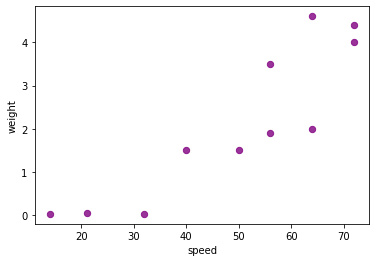

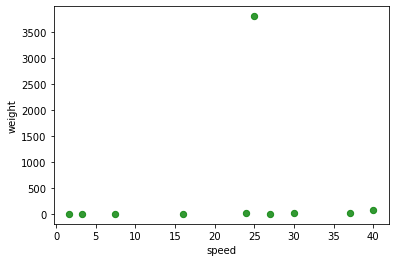

In [118]:
# My attempt at graphing 
Mammals[Mammals['hoppers'] == True].plot.scatter(x ='speed', y = 'weight', c = 'purple', s = (40), alpha = .8)
Mammals[Mammals['specials'] == True].plot.scatter(x ='speed', y = 'weight', c = 'green', s = 40, alpha = .8)


<AxesSubplot:xlabel='speed', ylabel='weight'>

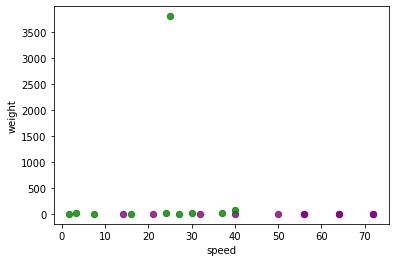

In [155]:
ax = Mammals[Mammals['hoppers'] == True].plot.scatter(x ='speed', y = 'weight', c = 'purple', s = (40), alpha = .8)
Mammals[Mammals['specials'] == True].plot.scatter(x ='speed', y = 'weight', c = 'green', s = 40, alpha = .8, ax = ax)


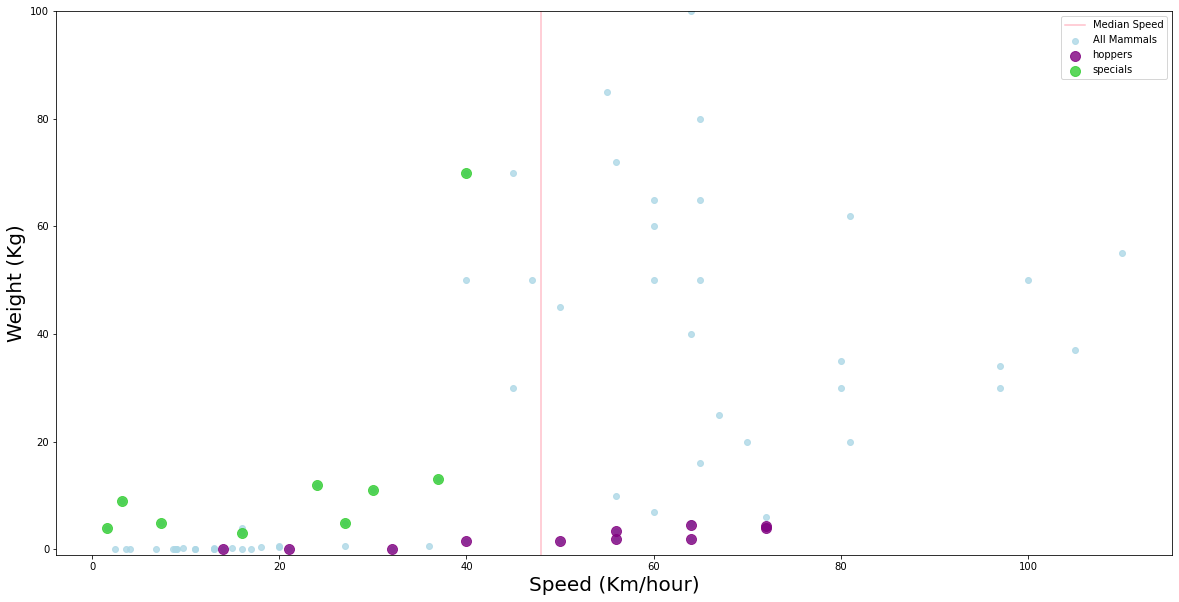

In [154]:
hopper_weights = Mammals[Mammals['hoppers'] == True]['weight']
hopper_speeds = Mammals[Mammals['hoppers'] == True]['speed']
specials_weights = Mammals[Mammals['specials'] == True]['weight']
specials_speeds = Mammals[Mammals['specials'] == True]['speed']
median_speed = Mammals['speed'].median()

plt.figure(figsize = (20, 10))
plt.scatter(Mammals.speed, Mammals.weight, c = 'lightblue', alpha = 0.8, label = 'All Mammals')
plt.scatter(hopper_speeds.values, hopper_weights.values, c = 'purple', alpha = 0.8, s= 100, label = 'hoppers')
plt.scatter(specials_speeds.values, specials_weights.values, c = 'limegreen', alpha = 0.8, s = 100, label = 'specials')
plt.axvline(x = median_speed, ymin=0, ymax=1, c = 'pink', label = 'Median Speed')
plt.xlabel('Speed (Km/hour)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.ylim(-1,100)

plt.legend()


plt.show()